Saving 4. Predict Heart Disease.csv to Predict Heart Disease (2).csv/4. Predict Heart Disease.csv
Sample data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  

No missing values found.

✅ Model Accuracy: 88.52%

🧮 Confusion Matrix:
[[25  4]
 [ 3 29]]


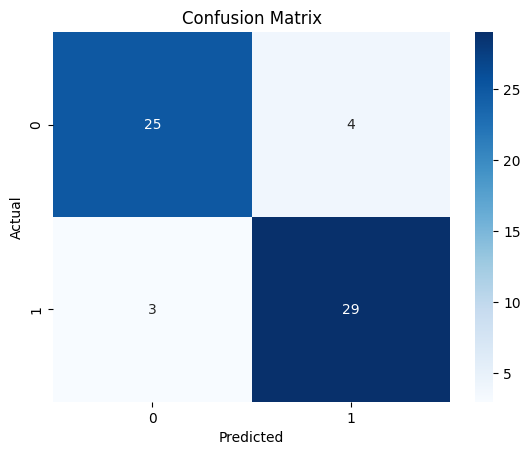


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [13]:
# Step 1: Upload CSV File (Google Colab / Jupyter compatible)
from IPython.display import display
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# For uploading file
from google.colab import files
uploaded = files.upload("Predict Heart Disease (2).csv")

# Get the uploaded file path
file_path = next(iter(uploaded))

# Step 2: Load and Validate Data
df = pd.read_csv(io.BytesIO(uploaded[file_path]))

# Display first few rows
print("Sample data:")
print(df.head())

# Optional: Check missing values
if df.isnull().sum().any():
    print("\nWarning: Missing values detected!")
else:
    print("\nNo missing values found.")

# Step 3: Preprocess the Data
def preprocess_data(df):
    # Encode categorical if needed
    if df['sex'].dtype != 'int':
        df['sex'] = df['sex'].map({'male': 0, 'female': 1})

    # Split features and target
    X = df.drop('target', axis=1)
    y = df['target']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

X_scaled, y = preprocess_data(df)

# Step 4: Train the Model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🧮 Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


